<a href="https://colab.research.google.com/github/ParimahSafarian/Demography/blob/main/Single_Parent_07_Simple_Branching_Process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single Parent Population
## seventh
### 00/03/11

Simple branching process critical exponent estimation.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

### n off-spring each by p probability

In [1]:
#Poisson distribution assumption

def next_gen(n, pc):
    n_next  = 0
    inf_num = 0
    for i in range(n):
        p = np.random.uniform(0, 1, 2)
        p[p > (1-pc)] = 1
        p[p < (1-pc)] = 0
        inf_num = np.sum(p)
        n_next += inf_num
    return int(n_next)

In [4]:
next_gen(1, 0)

0

### Critical value of $\lambda$ average of children number

In [5]:
#does it extinc?

def extinc(pop_0, pc):
    pop  = []
    time = []
    pop.append(pop_0)
    
    i = 0
    while 1:
        pop.append(next_gen(pop[i], pc))
        i += 1
        
        if pop[i] < pop[0]:
            return 1
        if pop[i] > 100 * pop[0]:
            return 0

In [6]:
#probability of extinction

def ext_prob(pop_0, pc):
    samples = 500
    extinctions = 0
    for s in range(samples):
        extinctions += extinc(pop_0, pc)

    extinction_probability = extinctions / samples

    return extinction_probability

CPU times: user 2min 1s, sys: 13.7 s, total: 2min 15s
Wall time: 2min


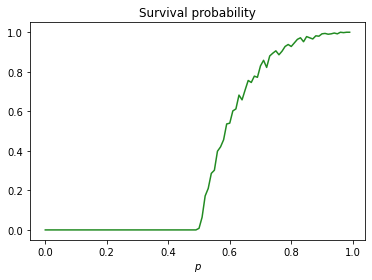

In [7]:
%%time

p_mat     = np.arange(0, 1, 0.01)
probability = np.zeros(np.size(p_mat)) 

pop_0 = 1

for i in range(np.size(p_mat)):
    probability[i] = ext_prob(pop_0, p_mat[i])
    
    
plt.plot(p_mat, 1-probability, c = 'forestgreen')
plt.title("Survival probability")
plt.xlabel("$p$")


In [22]:
%%time

# p_mat     = np.arange(0.5001, 0.505, 0.0001)
# p_mat     = 0.5 + 0.0001 * 2.0 ** np.arange(-10, 10, 1)
p_mat     = 0.5001 + np.arange(0, 0.01, 0.0001)
probability = np.zeros(len(p_mat)) 
print(len(p_mat))

pop_0 = 1

for i in range(len(p_mat)):
    probability[i] = ext_prob(pop_0, p_mat[i])



100
CPU times: user 5min 33s, sys: 40.7 s, total: 6min 13s
Wall time: 5min 28s


Text(0.5, 0, '$p$')

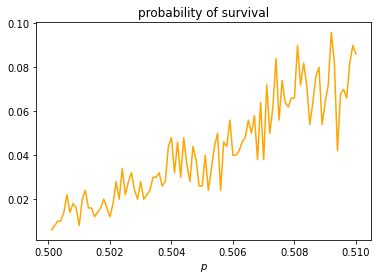

In [23]:
plt.plot(p_mat, (1 - probability), c = 'orange')
plt.title("probability of survival")
plt.xlabel("$p$")

# plt.savefig("survival probability.png")

In [ ]:
print(1-probability,'\n', p_mat, np.size(p_mat))

In [25]:
jump = 0
pc = 0.5 #+ 0.0001 * jump
fit = np.polyfit(np.log(p_mat[jump:] - pc), np.log(1-probability[jump:]), 1)

fit

array([0.61510538, 0.08181416])

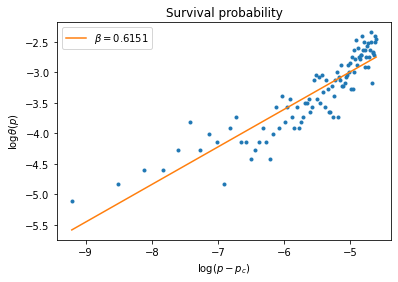

In [26]:

plt.plot(np.log(p_mat - pc), np.log(1-probability), '.')
plt.plot(np.log(p_mat - pc), fit[0] * np.log(p_mat - pc) + fit[1], label = f'$\u03B2={np.round(fit[0], 4)}$')

plt.title("Survival probability")
plt.ylabel("$\log{\u03B8 (p)}$")
plt.xlabel("$\log{(p - p_c)}$")

plt.legend()

# plt.savefig("1st critical exponent.png")

### Mean size
We are looking for cumulative population and it is finite for $\lambda$s which extinct and infinite for which don't for sure.


In [28]:
def final_cumulative_population(pop_0, pc):
    pop = []
    pop.append(pop_0)
    i = 0
    while pop[i] > 0:
        pop.append(next_gen(int(pop[i]), pc))
        i += 1
        
    return np.sum(pop[:])

In [ ]:
%%time

p_mat = np.arange(0.49, 0.5, 0.0001)
average_cum_pop = []
 

for p in p_mat:
    pop_0 = 1
    ave = 1000
    cum_pop = np.zeros(ave)
    for m in range(ave):
        cum_pop[m] = final_cumulative_population(pop_0, p)
    average_cum_pop.append(np.mean(cum_pop[:]))
    

CPU times: user 13min 54s, sys: 2min 2s, total: 15min 56s
Wall time: 13min 42s


Text(0.5, 0, '$p$')

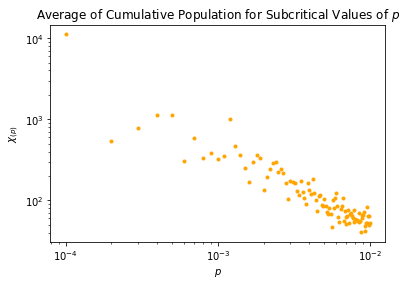

In [ ]:
plt.loglog(np.abs(p_mat[jump:-1] - pc), average_cum_pop[jump:-1], '.', c = 'orange')
plt.title("Average of Cumulative Population for Subcritical Values of $p$")
plt.ylabel("$\chi_{(p)}$")
plt.xlabel("$p$")

# plt.savefig("2nd critical exponent01.png")

In [ ]:
jump = 0
pc = 0.5 + 0.0005 * jump
pc = 0.5

fit2 = np.polyfit(np.log(np.abs(p_mat[:-1] - pc)), np.log(average_cum_pop[:-1]), 1)

fit2

array([-0.91718241, -0.29570554])

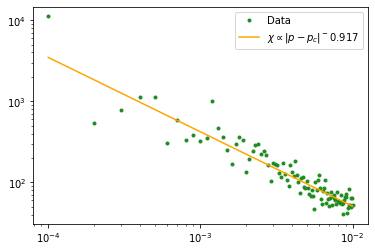

In [ ]:
plt.loglog(np.abs(p_mat[:-1]-0.5), average_cum_pop[:-1], '.', c = 'forestgreen', label = 'Data')
plt.loglog(np.abs(p_mat[:-1]-0.5), np.e ** (fit2[0] * np.log(np.abs(p_mat[:-1] - 0.5)) + fit2[1]), 
         c = 'orange', label = f'$\chi \propto |p - p_c|^{np.round(fit2[0], 3)}$')

plt.legend()

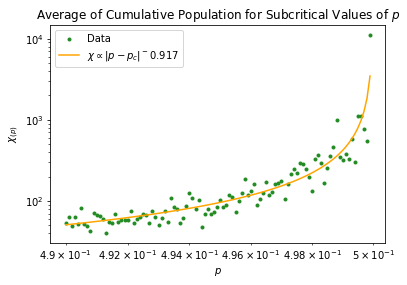

In [ ]:
plt.loglog(p_mat[:-1], average_cum_pop[:-1], '.', c = 'forestgreen', label = 'Data')
plt.loglog(p_mat[:-1], np.e ** (fit2[0] * np.log(np.abs(p_mat[:-1] - 0.5)) + fit2[1]), 
         c = 'orange', label = f'$\chi \propto |p - p_c|^{np.round(fit2[0], 3)}$')

plt.title("Average of Cumulative Population for Subcritical Values of $p$")
plt.ylabel("$\chi_{(p)}$")
plt.xlabel("$p$")
# plt.xlim(0, 1.2)
plt.legend()

# plt.savefig("2nd critical exponent02.png")

## $P_\chi (\chi)$ 
Distribution of cluster sizes.

In [32]:
%%time

pop_0, p = 1, 0.5

cum_pop = []

for sample in range(10000):
  cum_pop.append(final_cumulative_population(pop_0, p))

CPU times: user 38min 51s, sys: 4min 37s, total: 43min 28s
Wall time: 38min 20s


In [48]:
np.savetxt('cum_pop.csv', cum_pop, delimiter=',')

In [50]:
print(len(cum_pop))
print(cum_pop)


10000
[13, 152, 4, 6, 6, 73, 23, 1, 2, 6955, 74, 3, 1, 5, 1, 1, 184, 20, 30, 1, 2, 14, 1, 11, 4, 2, 1, 45, 145, 2, 1, 1, 8, 1, 11, 4, 6, 2, 141, 16, 20, 10, 1, 1, 3, 200, 1, 52, 18, 1, 5, 1374, 1, 1, 16, 7, 4, 16, 12, 19, 2, 433, 153, 5, 23, 33, 11, 361, 11, 1, 1, 1, 27, 659, 354, 26, 215, 1, 1, 2, 2805, 66, 1, 2, 1, 7, 13, 48553, 9, 16, 1, 2, 1, 57, 1, 16, 4, 2, 1, 1, 1, 3, 2, 8, 1, 18124, 14, 7208, 50, 1, 13, 2, 60, 1, 3, 1767, 1, 22, 55, 15, 1, 10, 6, 3, 3, 6, 5, 5, 4, 1, 167, 6350, 9, 7, 1, 5, 14, 1, 2, 5, 16, 1, 259, 4, 11, 1, 70, 51, 10, 7, 1, 4, 1, 9, 2031, 5, 9, 6, 16, 1, 1134, 4, 1, 13, 1, 1, 9, 2, 1, 212, 2, 9, 1, 7, 2, 1, 2, 7, 10, 1, 296, 2, 90, 1, 1, 7, 4, 1, 7, 1, 37, 28, 67, 1, 21, 24, 1, 13, 1, 2, 5, 2, 14, 29, 6, 1, 2, 1, 6, 5, 424, 3, 2, 7, 1, 1, 2, 1, 1, 1, 5, 2, 1, 48, 3, 67, 2, 14, 1, 3, 26, 2, 80, 1, 7, 1088, 234, 4, 82, 266, 5, 1, 2, 1, 2, 746, 1, 310, 3, 1, 10, 2, 4, 406, 1, 3, 1, 1, 2, 2, 1, 2095, 1, 8, 27, 11, 31, 2, 42, 1, 3, 2, 2310, 65, 5155, 12, 8, 2, 1, 6

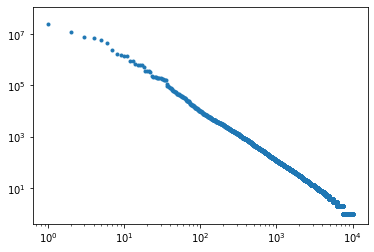

In [53]:
plt.loglog(sorted(cum_pop, reverse= True), '.')

In [54]:
np.histogram(cum_pop)

(array([9994,    3,    1,    0,    0,    1,    0,    0,    0,    1]),
 array([1.00000000e+00, 4.80985340e+06, 9.61970580e+06, 1.44295582e+07,
        1.92394106e+07, 2.40492630e+07, 2.88591154e+07, 3.36689678e+07,
        3.84788202e+07, 4.32886726e+07, 4.80985250e+07]))

Text(0.5, 1.0, '$\\chi$ size distribution for $p = $0.5')

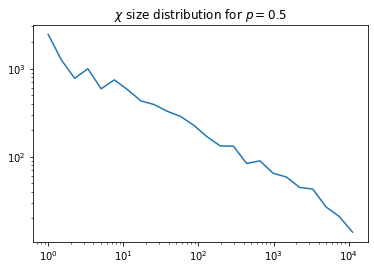

In [61]:
b = 1
a = 1.5
bins = b * a ** np.arange(25)
y, bins = np.histogram(cum_pop, bins = bins)
plt.loglog(bins[:-1], y)
plt.title(f"$\chi$ size distribution for $p = ${p}")

24
[2438 1252  776  995  590  745  577  431  391  328  287  228  169  133
  132   84   90   65   59   45   43   27   21   14]
[1.00000000e+00 1.50000000e+00 2.25000000e+00 3.37500000e+00
 5.06250000e+00 7.59375000e+00 1.13906250e+01 1.70859375e+01
 2.56289062e+01 3.84433594e+01 5.76650391e+01 8.64975586e+01
 1.29746338e+02 1.94619507e+02 2.91929260e+02 4.37893890e+02
 6.56840836e+02 9.85261253e+02 1.47789188e+03 2.21683782e+03
 3.32525673e+03 4.98788510e+03 7.48182764e+03 1.12227415e+04
 1.68341122e+04]


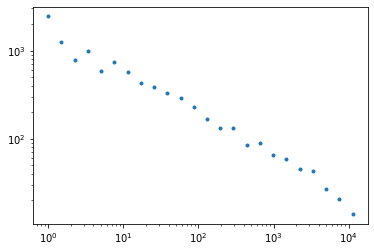

In [66]:
print(np.size(y[y>0]))
print(y)
print(bins)

plt.loglog(bins[:-1], y, '.')

In [63]:
fit = np.polyfit(np.log(bins[:-1]), np.log(y), 1)
fit

array([-0.48183483,  7.47127345])

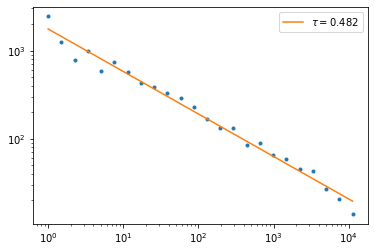

In [64]:
plt.loglog(bins[:-1], y, '.')
plt.loglog(bins[:-1], np.exp(fit[1] + fit[0] * np.log(bins[:-1])), label = f'$τ = ${-round(fit[0], 3)}')

plt.legend()

 Repeat caculation for a variety of size of systems. Then plot $\langle s^k \rangle$ versus size of the system.
 
\begin{equation}
n_s = s^{-\tau} \mathcal{F}(s/L^D)
\end{equation}



In [ ]:
def ngen_cumulative_population(pop_0, pc, generation):
    pop = []
    pop.append(pop_0)
    for i in range(generation):
        pop.append(next_gen(int(pop[i]), pc))
        
    return np.sum(pop[:])

In [ ]:
p = 0.5

ngen_cumulative_population(pop_0, p, generation)

NameError: ignored

CPU times: user 30.6 s, sys: 4.12 s, total: 34.7 s
Wall time: 30.1 s


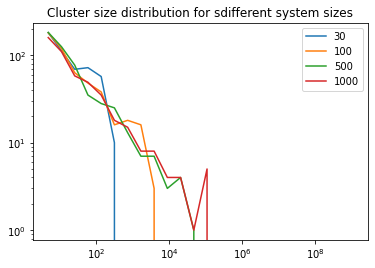

In [ ]:
%%time

b = 5
a = 2.3
bins = b * a ** np.arange(25)
ave = 1000
k   = np.arange(2, 7, 1)
gen_range = [30, 100, 500, 1000]
sk  = np.zeros((np.size(k), np.size(gen_range)))

for generation in gen_range:
    pop_0 = 1
    cum_pop = np.zeros(ave)
    for m in range(ave):
        cum_pop[m] = ngen_cumulative_population(pop_0, p, generation)
    y, bins = np.histogram(cum_pop, bins = bins)
    for j in range(np.size(k)):
        sk[j, gen_range.index(generation)] = np.mean(cum_pop ** k[j]) 
    plt.loglog(bins[:-1], y, label = f'{generation}')

plt.legend()
plt.title("Cluster size distribution for sdifferent system sizes")

s is collapse size.
\begin{align}
\langle s^k \rangle &= \int_1^\infty{s^{k-\tau} \mathcal{F}(s/L^D) ds} \\
&\propto L^{D(k-\tau + 1)}
\end{align}

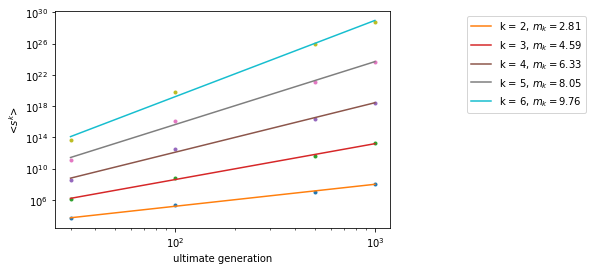

In [ ]:
mk = []
for j in range(len(k)):
    plt.loglog(gen_range, sk[j, :], '.')
    fit = np.polyfit(np.log(gen_range), np.log(sk[j, :]), 1)
    mk.append(fit[0])
    plt.loglog(gen_range, np.exp(fit[1] + fit[0] * np.log(gen_range)), label = f'k = {k[j]}, $m_k = ${round(fit[0], 2)}')
    
plt.ylabel("<$s^k$>")
plt.xlabel("ultimate generation")
plt.legend(loc = 'upper right', bbox_to_anchor=(1.6, 1))

Text(0.5, 0, '$k$')

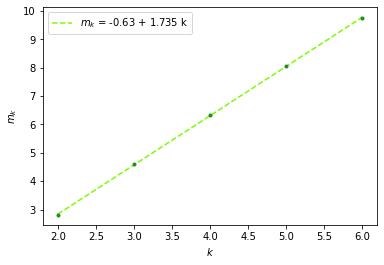

In [ ]:
# mk = np.array([2.9, 4.75, 6.55, 8.32, 10.07])
k  = np.arange(2, 7)

fit = np.polyfit(k, mk, 1)

plt.plot(k, (fit[1] + fit[0] * k), '--', c = 'lawngreen', label = f'$m_k$ = {round(fit[1], 3)} + {round(fit[0], 3)} k')
plt.plot(k, mk, '.', c = 'forestgreen')
plt.legend()
plt.ylabel("$m_k$")
plt.xlabel("$k$")

In [ ]:
tau = 1 - fit[1] / fit[0]
D   = fit[0]
print('τ = ', tau, 'D = ', D)

τ =  1.363082492922122 D =  1.735099495980593


Do the same for different value of p.

CPU times: user 2min 1s, sys: 14.4 s, total: 2min 15s
Wall time: 1min 59s


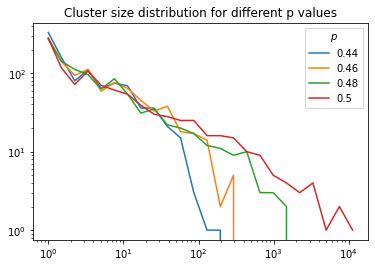

In [91]:
%%time

b = 1
a = 1.5
bins = b * a ** np.arange(25)
ave = 1000
k   = np.arange(2, 7, 1)
p_mat = np.array([0.44, 0.46, 0.48, 0.5])

sk  = np.zeros((np.size(k), np.size(p_mat)))

for p in p_mat:
    pop_0 = 1
    cum_pop = np.zeros(ave)
    for m in range(ave):
        cum_pop[m] = final_cumulative_population(pop_0, p)
    y, bins = np.histogram(cum_pop, bins = bins)
    for j in range(np.size(k)):
        sk[j, np.where(p_mat == p)[0][0]] = np.mean(cum_pop ** k[j]) 
    plt.loglog(bins[:-1], y, label = f'{round(p, 2)}')

plt.legend(title = '$p$')
plt.title("Cluster size distribution for different p values")

In [88]:
print(p_mat)

[0.44 0.46 0.48 0.5  0.52]


In [73]:
COLOR = ['deepskyblue', 'purple', 'orange', 'lawngreen', 'pink']

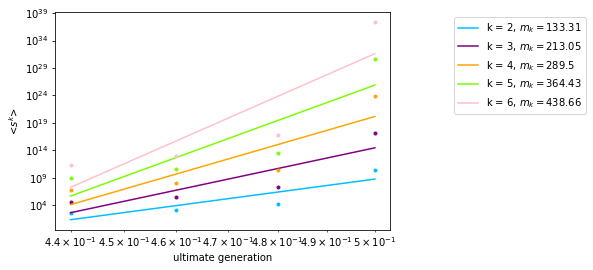

In [92]:
mk = []
for j in range(len(k)):
    plt.loglog(p_mat, sk[j, :], '.', c = COLOR[j])
    fit = np.polyfit(np.log(p_mat), np.log(sk[j, :]), 1)
    mk.append(fit[0])
    plt.loglog(p_mat, np.exp(fit[1] + fit[0] * np.log(p_mat)), c = COLOR[j], label = f'k = {k[j]}, $m_k = ${round(fit[0], 2)}')
    
plt.ylabel("<$s^k$>")
plt.xlabel("ultimate generation")
plt.legend(loc = 'upper right', bbox_to_anchor=(1.6, 1))

ofcourse these curves don't look linear... I know!

Text(0.5, 0, '$k$')

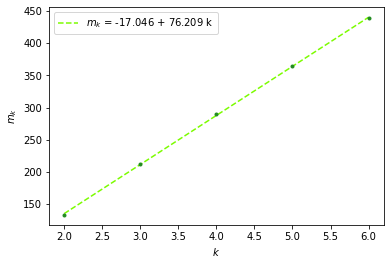

In [93]:
k  = np.arange(2, 7)

fit = np.polyfit(k, mk, 1)

plt.plot(k, (fit[1] + fit[0] * k), '--', c = 'lawngreen', label = f'$m_k$ = {round(fit[1], 3)} + {round(fit[0], 3)} k')
plt.plot(k, mk, '.', c = 'forestgreen')
plt.legend()
plt.ylabel("$m_k$")
plt.xlabel("$k$")

In [94]:
tau = 1 - fit[1] / fit[0]
D   = fit[0]
print('τ = ', tau, 'D = ', D)

τ =  1.2236773779579788 D =  76.20884005702115


0.0
[-0.52075238  5.00891676]


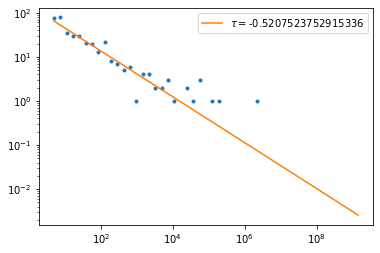

In [ ]:
uplim = np.size(y[y>0])
print(y[20])
uplim = 20
fit = np.polyfit(np.log(bins[:uplim]), np.log(y[:uplim]), 1)
print(fit)
plt.loglog(bins[:-1], y, '.')
plt.loglog(bins[:-1], np.exp(fit[1] + fit[0] * np.log(bins[:-1])), label = f'$τ = ${fit[0]}')

plt.legend()

### $P_k(\lambda)$ 
One can ask for the probability $P_k(\lambda)$ that the number of descendants is at least k.

In [ ]:
def population(pop_0, p, generation):
    pop = []
    survival = np.zeros(generation)
    pop.append(pop_0)
    survival[0] = 1
    for t in range(generation):
        new_pop = next_gen(int(pop[t]), p)
        pop.append(new_pop)

        if t < generation-1 and new_pop > 0:
            survival[t+1] = 1
        else:
            break
    return survival

CPU times: user 29.9 s, sys: 4.8 s, total: 34.7 s
Wall time: 29.6 s


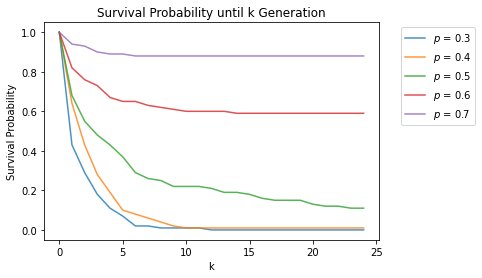

In [ ]:
%%time

generation = 25
samples    = 100
pop_0      = 1


p_mat = np.arange(0.3, 0.8, 0.1)

survival = np.zeros(generation)

for p in p_mat:
    survival = 0
    for s in range(samples):
        survival += population(pop_0, p, generation)
    survival_probability = survival / samples
    plt.plot(survival_probability, alpha = 0.8, label = f'$p$ = {np.round(p, 3)}')
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Survival Probability until k Generation")
plt.ylabel("Survival Probability")
plt.xlabel("k")

# plt.savefig("Survival Probability.png")

Clearly for supercritical curves it tends to a nonzero value and for subcritical ones it decays exponentially. Critical curve has a different behavoir as we expect.
$P_k(\lambda) \propto k^{-\frac{1}{\delta}}$

In [ ]:
generation = 200
samples    = 5000
pop_0      = 1

survival = np.zeros(generation)
k        = np.arange(generation) + 1

p = 0.5

survival = 0
for s in range(samples):
    survival += population(pop_0, p, generation)
survival_probability = survival / samples

print(survival_probability)

fit3 = np.polyfit(np.log(k[5:]), np.log(survival_probability[5:]), 1)
fit3

[1.     0.7556 0.6132 0.5268 0.4588 0.406  0.3704 0.341  0.3092 0.2866
 0.2682 0.2502 0.234  0.2164 0.2054 0.1964 0.1866 0.1786 0.1706 0.163
 0.1572 0.151  0.1452 0.1416 0.1376 0.1318 0.1274 0.123  0.1186 0.1144
 0.111  0.1068 0.1032 0.1    0.0972 0.095  0.0936 0.0914 0.0882 0.0872
 0.085  0.083  0.0822 0.08   0.0776 0.0766 0.0756 0.074  0.0726 0.0708
 0.0698 0.0688 0.0682 0.0662 0.0658 0.0648 0.0636 0.0624 0.0612 0.0602
 0.059  0.0568 0.056  0.0554 0.0538 0.0526 0.0516 0.0506 0.0504 0.0496
 0.049  0.0486 0.0482 0.0476 0.0464 0.046  0.0458 0.045  0.044  0.0434
 0.0432 0.0432 0.0422 0.0418 0.0412 0.0408 0.0402 0.04   0.0398 0.0396
 0.0392 0.0388 0.0382 0.0378 0.0368 0.036  0.0354 0.035  0.0348 0.0346
 0.0342 0.0338 0.0334 0.0324 0.0318 0.0318 0.0318 0.0316 0.0312 0.031
 0.0306 0.0302 0.0298 0.0292 0.0292 0.0288 0.0286 0.0286 0.0286 0.0286
 0.0284 0.0282 0.0282 0.028  0.028  0.0278 0.0276 0.0274 0.0268 0.0262
 0.0256 0.0254 0.0254 0.0252 0.025  0.0248 0.0248 0.0248 0.0248 0.0246
 0.0246 

array([-0.94804252,  1.01175089])

In [ ]:
delta = -1/fit3[0]
delta

1.054805013730273

Make an estimation closer to 1 by increasing "generations".

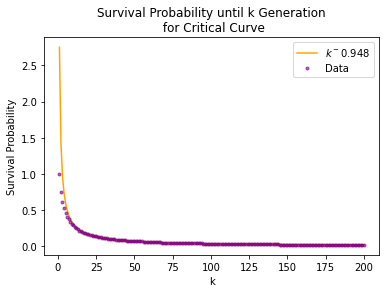

In [ ]:
plt.plot(k, np.e ** (fit3[0] * np.log(k) + fit3[1]), c = 'orange', label = f'$k^{np.round(fit3[0], 3)}$' )
plt.plot(k, survival_probability, '.', c = 'purple',alpha = 0.6 , label = 'Data')

plt.title("Survival Probability until k Generation\n for Critical Curve")
plt.ylabel("Survival Probability")
plt.xlabel("k")

plt.legend()

# plt.savefig("Critical Curve.png")

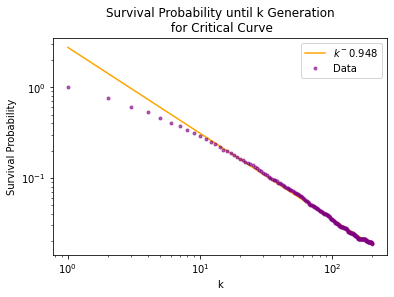

In [ ]:
plt.loglog(k, np.e ** (fit3[0] * np.log(k) + fit3[1]), c = 'orange', label = f'$k^{np.round(fit3[0], 3)}$' )
plt.loglog(k, survival_probability, '.', c = 'purple',alpha = 0.6 , label = 'Data')

plt.title("Survival Probability until k Generation\n for Critical Curve")
plt.ylabel("Survival Probability")
plt.xlabel("k")

plt.legend()